# EDA - SECOP II - Contratos Electronicos

## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Original Data

In [2]:
df = pd.read_csv("../Data/SECOP_II_Contratos_Electronicos.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373920 entries, 0 to 373919
Data columns (total 71 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Nombre Entidad                                                      373920 non-null  object 
 1   Nit Entidad                                                         373920 non-null  int64  
 2   Departamento                                                        373920 non-null  object 
 3   Ciudad                                                              373920 non-null  object 
 4   Localización                                                        373920 non-null  object 
 5   Orden                                                               373920 non-null  object 
 6   Sector                                                              373920 non-null  object 
 7   Ra

## Drop Useless Columns

In [4]:
columns_original = list(df.columns)
df.columns

Index(['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Ciudad',
       'Localización', 'Orden', 'Sector', 'Rama', 'Entidad Centralizada',
       'Proceso de Compra', 'ID Contrato', 'Referencia del Contrato',
       'Estado Contrato', 'Codigo de Categoria Principal',
       'Descripcion del Proceso', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Justificacion Modalidad de Contratacion',
       'Fecha de Firma', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion', 'Condiciones de Entrega',
       'TipoDocProveedor', 'Documento Proveedor', 'Proveedor Adjudicado',
       'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
       'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Val

In [5]:
columns_to_drop = [
    # Sector already filtered in downloading
    "Sector",
    
    "Nombre Entidad",
    "Nit Entidad",
    "Localización",
    "Proceso de Compra",
    "ID Contrato",
    "Referencia del Contrato",
    "Codigo de Categoria Principal",
    "Descripcion del Proceso",
    "TipoDocProveedor",
    "Documento Proveedor",
    "Proveedor Adjudicado",
    "URLProceso",
    "Puntos del Acuerdo",
    "Pilares del Acuerdo",
    "Nombre Representante Legal",
    "Tipo de Identificación Representante Legal",
    "Identificación Representante Legal",
    "Género Representante Legal",
    "Ultima Actualizacion",
    "Codigo Entidad",
    "Codigo Proveedor",
    "Objeto del Contrato",
]
len(columns_to_drop)

23

In [6]:
df_filtered = df.drop(columns=columns_to_drop, inplace=False).copy()

In [7]:
columns_filtered = df_filtered.columns

In [8]:
assert(len(columns_original) == (len(columns_filtered) + len(columns_to_drop)))

In [9]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373920 entries, 0 to 373919
Data columns (total 48 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Departamento                                                        373920 non-null  object 
 1   Ciudad                                                              373920 non-null  object 
 2   Orden                                                               373920 non-null  object 
 3   Rama                                                                373920 non-null  object 
 4   Entidad Centralizada                                                373920 non-null  object 
 5   Estado Contrato                                                     373920 non-null  object 
 6   Tipo de Contrato                                                    373920 non-null  object 
 7   Mo

In [25]:
df_filtered.head()

,Departamento,Ciudad,Orden,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Justificacion Modalidad de Contratacion,Fecha de Firma,...,Dias Adicionados,Nacionalidad Representante Legal,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Fecha Inicio Liquidacion,Fecha Fin Liquidacion
0,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,Modificado,Prestación de servicios,Contratación régimen especial,Regla aplicable,03/14/2019,...,0,colombiana,0,0,0,0,0,0,NaN,NaN
1,Caldas,Filadelfia,Territorial,Corporación Autónoma,Centralizada,Modificado,DecreeLaw092/2017,Contratación régimen especial,Decree092/2017,01/17/2020,...,0,Colombiana,0,0,0,0,0,0,2020-03-31 17:00:00,2020-07-31 17:00:00
2,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,terminado,Prestación de servicios,Contratación régimen especial,Regla aplicable,02/03/2020,...,0,COLOMBIA,0,0,0,0,0,0,NaN,NaN
3,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,Modificado,Prestación de servicios,Contratación régimen especial,Regla aplicable,05/05/2022,...,0,Colombiano,0,0,0,152590122,0,0,NaN,NaN
4,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,Modificado,Prestación de servicios,Contratación régimen especial,Regla aplicable,02/01/2020,...,122,COLOMBIANA,0,0,0,0,0,0,NaN,NaN


## Exploratory Data Analysis

In [13]:
valor_minimo = df['Valor del Contrato'].min()
valor_maximo = df['Valor del Contrato'].max()
(valor_minimo, valor_maximo)

(0, 6158661742599964)

<AxesSubplot:>

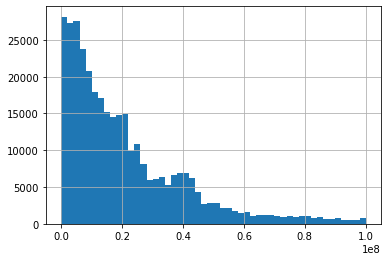

In [12]:
df[df['Valor del Contrato']<=100000000]['Valor del Contrato'].hist(bins=50)

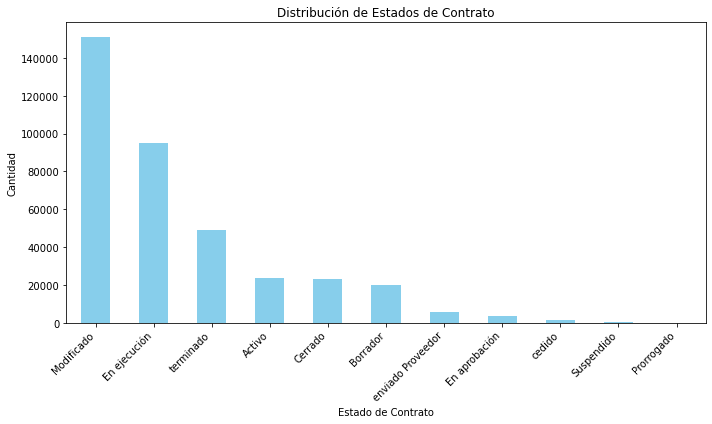

In [11]:
estado_contrato_counts = df_filtered['Estado Contrato'].value_counts()

plt.figure(figsize=(10, 6))
estado_contrato_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Estados de Contrato')
plt.xlabel('Estado de Contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [13]:
contratos_terminados = df[df['Estado Contrato'].isin(['Terminado', 'Cerrado'])]

<AxesSubplot:>

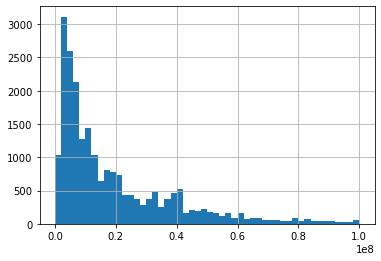

In [16]:
contratos_terminados[contratos_terminados['Valor del Contrato']<=100000000]['Valor del Contrato'].hist(bins=50)

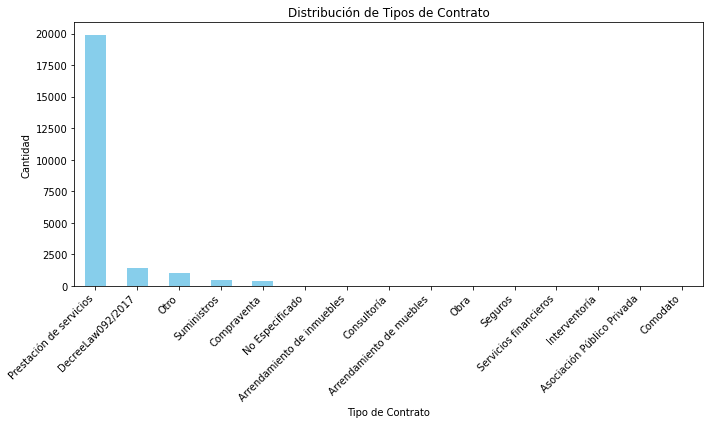

In [23]:
tipo_contrato_counts = contratos_terminados['Tipo de Contrato'].value_counts()

plt.figure(figsize=(10, 6))
tipo_contrato_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-25-380cd76fcf9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contratos_terminados['Fecha de Fin de Ejecucion'] = pd.to_datetime(contratos_terminados['Fecha de Fin de Ejecucion'], errors='coerce')


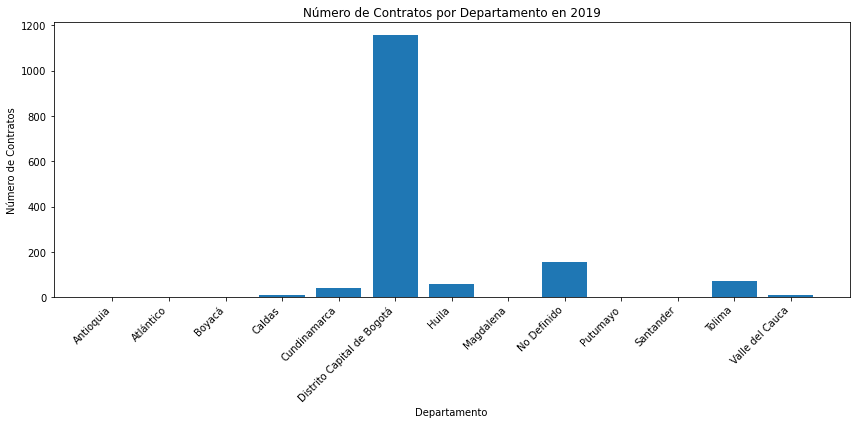

In [25]:
contratos_terminados['Fecha de Fin de Ejecucion'] = pd.to_datetime(contratos_terminados['Fecha de Fin de Ejecucion'], errors='coerce')

contratos_2019 = contratos_terminados[contratos_terminados['Fecha de Fin de Ejecucion'].dt.year == 2019]

# Contar el número de contratos por departamento
contratos_por_departamento = contratos_2019.groupby('Departamento').size().reset_index(name='Numero de Contratos')

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(contratos_por_departamento['Departamento'], contratos_por_departamento['Numero de Contratos'])
plt.title('Número de Contratos por Departamento en 2019')
plt.xlabel('Departamento')
plt.ylabel('Número de Contratos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-29-fdf2bd71f1c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contratos_terminados['Fecha de Fin de Ejecucion'] = pd.to_datetime(contratos_terminados['Fecha de Fin de Ejecucion'], errors='coerce')
<ipython-input-29-fdf2bd71f1c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contratos_terminados['Año'] = contratos_terminados['Fecha de Fin de Ejecucion'].dt.year


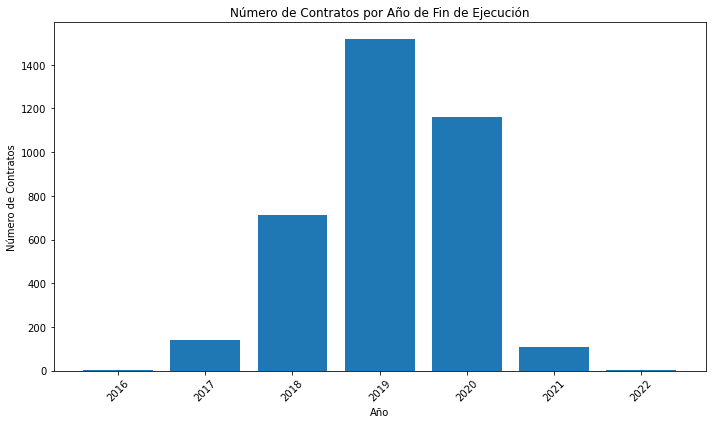

In [29]:

contratos_terminados['Fecha de Fin de Ejecucion'] = pd.to_datetime(contratos_terminados['Fecha de Fin de Ejecucion'], errors='coerce')

# Extraer el año de la fecha de fin de ejecución
contratos_terminados['Año'] = contratos_terminados['Fecha de Fin de Ejecucion'].dt.year

# Contar el número de contratos por año
contratos_por_año = contratos_terminados.groupby('Año').size().reset_index(name='Numero de Contratos')

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(contratos_por_año['Año'], contratos_por_año['Numero de Contratos'])
plt.title('Número de Contratos por Año de Fin de Ejecución')
plt.xlabel('Año')
plt.ylabel('Número de Contratos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-30-7e6fcb705060>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contratos_terminados['Fecha de Inicio de Ejecucion'] = pd.to_datetime(contratos_terminados['Fecha de Inicio de Ejecucion'], errors='coerce')
<ipython-input-30-7e6fcb705060>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contratos_terminados['Año'] = contratos_terminados['Fecha de Inicio de Ejecucion'].dt.year


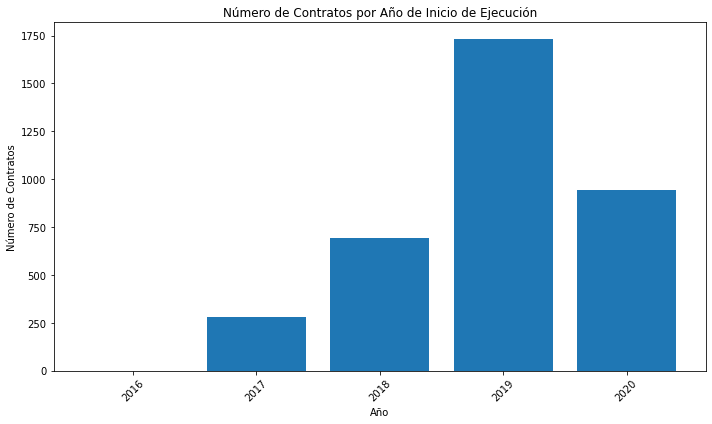

In [30]:

contratos_terminados['Fecha de Inicio de Ejecucion'] = pd.to_datetime(contratos_terminados['Fecha de Inicio de Ejecucion'], errors='coerce')

# Extraer el año de la fecha de fin de ejecución
contratos_terminados['Año'] = contratos_terminados['Fecha de Inicio de Ejecucion'].dt.year

# Contar el número de contratos por año
contratos_por_año = contratos_terminados.groupby('Año').size().reset_index(name='Numero de Contratos')

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(contratos_por_año['Año'], contratos_por_año['Numero de Contratos'])
plt.title('Número de Contratos por Año de Inicio de Ejecución')
plt.xlabel('Año')
plt.ylabel('Número de Contratos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Departamento

In [61]:
category_counts = df['Departamento'].value_counts().reset_index()
category_counts.columns = ['Departamento', 'Count']

mean_count = category_counts['Count'].mean()
median_count = category_counts['Count'].median()

# Calculate the percentage for each category
category_counts['Percentage'] = (category_counts['Count'] / category_counts['Count'].sum())

# Calculate the cumulative percentage
category_counts['Cumulative Percentage'] = category_counts['Percentage'].cumsum()

total_rows = len(category_counts)
category_counts['Row Cumulative Percentage'] = (category_counts.index + 1) / total_rows * 100

In [62]:
category_counts

,Departamento,Count,Percentage,Cumulative Percentage,Row Cumulative Percentage
0,Distrito Capital de Bogotá,217469,0.581592,0.581592,2.941176
1,Valle del Cauca,23916,0.063960,0.645553,5.882353
2,Antioquia,11919,0.031876,0.677428,8.823529
3,Cundinamarca,10756,0.028766,0.706194,11.764706
4,Atlántico,10156,0.027161,0.733355,14.705882
5,Tolima,9184,0.024561,0.757916,17.647059
6,Magdalena,8326,0.022267,0.780183,20.588235
7,Caldas,8291,0.022173,0.802356,23.529412
8,Santander,8004,0.021406,0.823762,26.470588
9,Norte de Santander,7827,0.020932,0.844694,29.411765


In [63]:
category_counts.describe()

,Count,Percentage,Cumulative Percentage,Row Cumulative Percentage
count,34.000000,34.000000,34.000000,34.000000
mean,10997.647059,0.029412,0.895562,51.470588
std,36805.670772,0.098432,0.119061,29.288959
min,7.000000,0.000019,0.581592,2.941176
25%,852.000000,0.002279,0.828995,27.205882
50%,3557.500000,0.009514,0.943410,51.470588
75%,7959.750000,0.021287,0.992644,75.735294
max,217469.000000,0.581592,1.000000,100.000000


In [64]:
# Create a bar plot using Plotly Express
fig = px.bar(category_counts, x='Departamento', y='Count', title='Contratos por Departamento')
# fig.update_traces(marker_color='skyblue')

# Add horizontal lines for mean and median
fig.add_shape(type='line',
              x0=-0.5, x1=len(category_counts) - 0.5,
              y0=mean_count, y1=mean_count,
              line=dict(color='red', width=2),
              name=f'Mean: {mean_count:.2f}')

fig.add_shape(type='line',
              x0=-0.5, x1=len(category_counts) - 0.5,
              y0=median_count, y1=median_count,
              line=dict(color='blue', width=2),
              name=f'Median: {median_count:.2f}')

# Customize the layout (optional)
fig.update_layout(xaxis_title='Departamento', yaxis_title='Contratos'
                #   , xaxis_tickangle=0
                  )

# Show the plot
fig.show()

#### Filtering Bogotá

In [65]:
category_counts_without_bogota = category_counts[category_counts['Departamento'] != 'Distrito Capital de Bogotá']

In [66]:
# Create a bar plot using Plotly Express
fig = px.bar(category_counts_without_bogota, x='Departamento', y='Count', title='Contratos por Departamento')
# fig.update_traces(marker_color='skyblue')

# Add horizontal lines for mean and median
fig.add_shape(type='line',
              x0=-0.5, x1=len(category_counts) - 0.5,
              y0=mean_count, y1=mean_count,
              line=dict(color='red', width=2),
              name=f'Mean: {mean_count:.2f}')

fig.add_shape(type='line',
              x0=-0.5, x1=len(category_counts) - 0.5,
              y0=median_count, y1=median_count,
              line=dict(color='blue', width=2),
              name=f'Median: {median_count:.2f}')

# Customize the layout (optional)
fig.update_layout(xaxis_title='Departamento', yaxis_title='Contratos'
                #   , xaxis_tickangle=0
                  )

# Show the plot
fig.show()

#### Pareto Rule

In [67]:
category_counts_cumulative_percentage = category_counts[category_counts['Cumulative Percentage'] <= 0.8]

In [69]:
category_counts_cumulative_percentage

,Departamento,Count,Percentage,Cumulative Percentage,Row Cumulative Percentage
0,Distrito Capital de Bogotá,217469,0.581592,0.581592,2.941176
1,Valle del Cauca,23916,0.063960,0.645553,5.882353
2,Antioquia,11919,0.031876,0.677428,8.823529
3,Cundinamarca,10756,0.028766,0.706194,11.764706
4,Atlántico,10156,0.027161,0.733355,14.705882
5,Tolima,9184,0.024561,0.757916,17.647059
6,Magdalena,8326,0.022267,0.780183,20.588235


In [70]:
# Create a bar plot using Plotly Express
fig = px.bar(category_counts_cumulative_percentage, x='Departamento', y='Count', title='Contratos por Departamento')
# fig.update_traces(marker_color='skyblue')

# Add horizontal lines for mean and median
fig.add_shape(type='line',
              x0=-0.5, x1=len(category_counts) - 0.5,
              y0=mean_count, y1=mean_count,
              line=dict(color='red', width=2),
              name=f'Mean: {mean_count:.2f}')

fig.add_shape(type='line',
              x0=-0.5, x1=len(category_counts) - 0.5,
              y0=median_count, y1=median_count,
              line=dict(color='blue', width=2),
              name=f'Median: {median_count:.2f}')

# Customize the layout (optional)
fig.update_layout(xaxis_title='Departamento', yaxis_title='Contratos'
                #   , xaxis_tickangle=0
                  )

# Show the plot
fig.show()

In [72]:
category_counts_cumulative_percentage = category_counts[category_counts['Cumulative Percentage'] <= 0.8]
category_counts_cumulative_percentage_without_bogota = category_counts_cumulative_percentage[category_counts_cumulative_percentage['Departamento'] != 'Distrito Capital de Bogotá']

In [73]:
# Create a bar plot using Plotly Express
fig = px.bar(category_counts_cumulative_percentage_without_bogota, x='Departamento', y='Count', title='Contratos por Departamento')
# fig.update_traces(marker_color='skyblue')

# Add horizontal lines for mean and median
fig.add_shape(type='line',
              x0=-0.5, x1=len(category_counts) - 0.5,
              y0=mean_count, y1=mean_count,
              line=dict(color='red', width=2),
              name=f'Mean: {mean_count:.2f}')

fig.add_shape(type='line',
              x0=-0.5, x1=len(category_counts) - 0.5,
              y0=median_count, y1=median_count,
              line=dict(color='blue', width=2),
              name=f'Median: {median_count:.2f}')

# Customize the layout (optional)
fig.update_layout(xaxis_title='Departamento', yaxis_title='Contratos'
                #   , xaxis_tickangle=0
                  )

# Show the plot
fig.show()